In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

## Understanding the data

In [4]:
#Reading and loading train into datasets
dataset=pd.read_csv("/Users/sudeepsawant/MS data/MachineLearningLAB/MachineLearningLAB/ML Assignment/CE802_P2_Data/CE802_P2_Data.csv")
dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16,6.03,-4.56,30.00,63.04,0.55,-0.78,0.96,-1.67,1,-339.75,0.84,9.90,-2.22,-9.53,False
1,6,1.41,-4.24,31.38,100.04,0.06,1.08,0.60,-3.67,1,-246.75,-0.62,12.32,-0.56,NaN,False
2,630,43.35,0.50,50.70,219.04,-3.46,10.08,5.65,-14.67,10,-129.75,-3.40,1.80,8.48,-10.29,False
3,30,2.79,-3.58,31.83,69.04,-0.40,-0.09,0.18,-1.67,1,-276.75,-0.32,13.32,1.36,-9.92,False
4,18,0.36,-6.62,32.97,75.04,2.43,0.24,0.48,-0.67,1,-294.75,3.14,10.80,-5.86,NaN,True


In [5]:
#Analysing trainin
dataset.tail()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
1495,740,19.05,5.18,46.65,54.04,-3.86,15.30,9.80,-4.67,10,-534.75,1.08,1.24,4.78,NaN,False
1496,2,4.29,-5.10,30.54,86.04,1.84,-1.77,0.73,-1.67,1,-279.75,-1.56,13.72,-1.46,-10.00,False
1497,160,20.25,5.42,51.60,114.04,-3.73,15.18,7.30,-4.67,10,-399.75,0.44,-0.56,10.12,NaN,True
1498,220,20.10,2.12,50.55,239.04,-3.24,13.38,6.40,-14.67,10,-39.75,-3.72,1.22,9.06,NaN,False
1499,20,5.31,-3.02,31.44,72.04,0.74,2.16,1.02,0.33,1,-297.75,1.64,14.46,1.28,-11.14,True


In [6]:
#Analysing all columns in training dataset
dataset.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
count,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,750.000000
mean,218.049333,14.90628,-0.829733,41.063440,133.485333,-1.592947,5.390220,3.854280,-7.308000,5.403333,-307.992000,0.244707,7.315067,3.542427,-10.463013
std,234.669160,12.97563,5.090345,9.500727,71.416874,2.513850,7.662813,3.465276,7.159315,4.504907,120.565344,2.217929,4.982472,5.081288,1.005117
min,0.000000,0.00000,-17.560000,30.000000,54.040000,-6.070000,-19.800000,0.000000,-24.670000,0.000000,-609.750000,-4.480000,-1.700000,-14.520000,-12.820000
25%,30.000000,3.72000,-4.600000,32.160000,78.040000,-4.000000,-0.300000,0.600000,-14.670000,1.000000,-354.750000,-1.060000,2.560000,-0.220000,-11.210000
50%,100.000000,6.21000,-2.810000,33.240000,98.040000,-0.610000,2.400000,1.020000,-3.670000,1.000000,-291.750000,-0.060000,9.220000,1.580000,-10.470000
75%,390.000000,24.60000,4.080000,49.350000,194.040000,0.350000,12.877500,7.050000,-1.670000,10.000000,-252.750000,1.400000,10.985000,8.500000,-9.742500
max,780.000000,47.10000,8.300000,60.450000,299.040000,6.070000,18.810000,10.350000,1.330000,10.000000,35.250000,8.720000,22.780000,12.860000,-7.740000


(array([670., 214.,  89.,  78.,  68.,  80.,  75.,  73.,  95.,  58.]),
 array([  0.,  78., 156., 234., 312., 390., 468., 546., 624., 702., 780.]),
 <BarContainer object of 10 artists>)

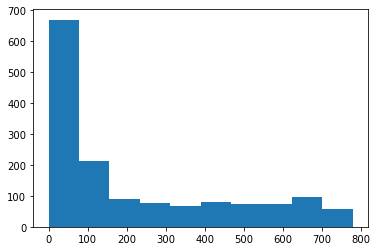

In [7]:
# checking sample distribution
plt.hist(dataset.F1)

In [8]:
dataset.shape

(1500, 16)

In [9]:
dataset.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'Class'],
      dtype='object')

In [10]:
dataset.nunique()

F1       141
F2       400
F3       650
F4       214
F5        91
F6       656
F7       660
F8       216
F9        11
F10        4
F11       80
F12      432
F13      649
F14      646
F15      331
Class      2
dtype: int64

<AxesSubplot:>

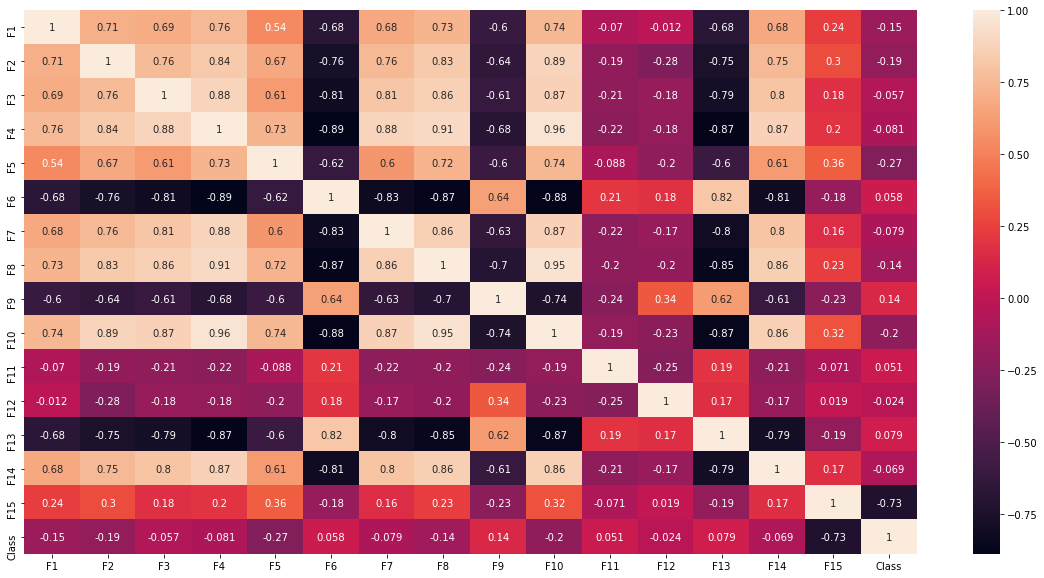

In [11]:
#Plotting Correlation
plt.figure(figsize=(20,10))
correlation=dataset.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)


## Cleaning the data

In [12]:
dataset.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

(array([ 22.,  52.,  98., 116., 129., 135., 101.,  69.,  19.,   9.]),
 array([-12.82 , -12.312, -11.804, -11.296, -10.788, -10.28 ,  -9.772,
         -9.264,  -8.756,  -8.248,  -7.74 ]),
 <BarContainer object of 10 artists>)

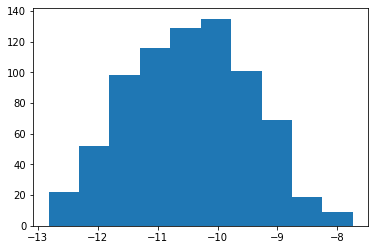

In [13]:
# checking sample distribution
plt.hist(dataset.F15)

In [14]:
# replacing 0 and 1 with true false
cleanup = {"Class": {False:0, True:1}}
dataset.replace(cleanup, inplace=True)

<AxesSubplot:>

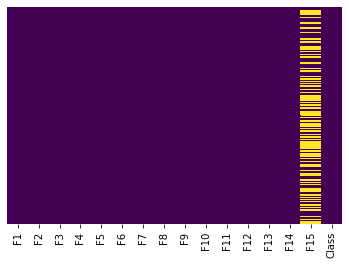

In [15]:
# heatap to identify missing value
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [16]:
#treating missing value with mean value
dataset=dataset.fillna(dataset.mean())
dataset.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
Class    0
dtype: int64

## Data Spliting

In [17]:
# traget data and features seprating 
Input=dataset.iloc[:,0:16]
x = Input.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset = pd.DataFrame(x_scaled)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.020513,0.128025,0.502707,0.000000,0.036735,0.545305,0.492618,0.092754,0.884615,0.1,0.418605,0.403030,0.473856,0.449233,0.647638,0.0
1,0.007692,0.029936,0.515081,0.045320,0.187755,0.504942,0.540793,0.057971,0.807692,0.1,0.562791,0.292424,0.572712,0.509861,0.463974,0.0
2,0.807692,0.920382,0.698376,0.679803,0.673469,0.214992,0.773893,0.545894,0.384615,1.0,0.744186,0.081818,0.142974,0.840029,0.498031,0.0
3,0.038462,0.059236,0.540603,0.060099,0.061224,0.467051,0.510490,0.017391,0.884615,0.1,0.516279,0.315152,0.613562,0.579985,0.570866,0.0
4,0.023077,0.007643,0.423047,0.097537,0.085714,0.700165,0.519037,0.046377,0.923077,0.1,0.488372,0.577273,0.510621,0.316289,0.463974,1.0


In [18]:
# dataset column rename
dataset=dataset.rename(columns={0:'F1',1:'F2',2:'F3',3:'F4',4:'F5',5:'F6',6:'F7',7:'F8',8:'F9',9:'F10',10:'F11',11:'F12',12:'F13',13:'F14',14:'F15',15:'Class'})

In [19]:
from sklearn.model_selection import train_test_split
X = dataset.loc[:, dataset.columns != 'Class']
y = dataset.loc[:, dataset.columns == 'Class']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


## Decision Tree Model 

In [21]:
# building Decision Tree  classifier model and training 
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
### Lets Do the prediction
y_pred = classifier.predict(X_test)

In [23]:
# Confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[156  52]
 [ 47 120]]
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76       208
         1.0       0.70      0.72      0.71       167

    accuracy                           0.74       375
   macro avg       0.73      0.73      0.73       375
weighted avg       0.74      0.74      0.74       375



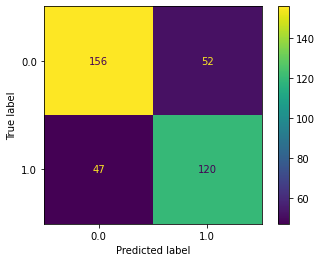

In [24]:
#plotting Confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

## Random forest classifier


In [25]:
# Building and training 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=150,max_depth=2, random_state=0)
clf.fit(X_train, y_train)


<ipython-input-25-4b081b46cdf5>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, n_estimators=150, random_state=0)

In [26]:
clf.predict(X_test)

array([1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0.

In [27]:
#import classification_report
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76       208
         1.0       0.70      0.72      0.71       167

    accuracy                           0.74       375
   macro avg       0.73      0.73      0.73       375
weighted avg       0.74      0.74      0.74       375



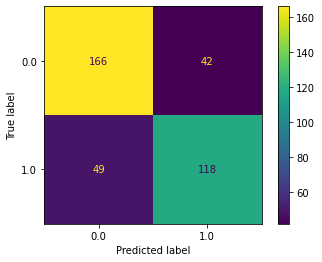

In [29]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

## SVM

In [30]:
#Bulding and triang svm model
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf',C=125)
svclassifier.fit(X_train, y_train)

/Users/sudeepsawant/miniforge3/envs/python38-demo-v2/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=125)

In [31]:
#predicting test data
y_pred = svclassifier.predict(X_test)

In [32]:
#calculating classification_report and confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[193  15]
 [ 15 152]]
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       208
         1.0       0.91      0.91      0.91       167

    accuracy                           0.92       375
   macro avg       0.92      0.92      0.92       375
weighted avg       0.92      0.92      0.92       375



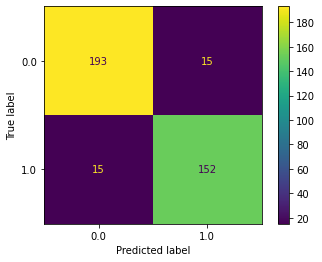

In [33]:
#plotting Confusion matrix
plot_confusion_matrix(svclassifier, X_test, y_test)  
plt.show()

## Get P2 Test Data from CSV

In [38]:
# Loading test data in DF
test_dataset=pd.read_csv("/Users/sudeepsawant/MS data/MachineLearningLAB/MachineLearningLAB/ML Assignment/CE802_P2_Data/CE802_P2_Test.csv")

In [39]:
# Checking test data
test_dataset.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,750.000000,0.0
mean,218.597333,15.303280,-0.713413,41.451160,130.947333,-1.643340,5.587480,3.895293,-7.314000,5.512667,-314.940000,0.465667,6.918293,3.805173,-10.496347,NaN
std,232.291403,12.917799,5.129234,9.715172,68.665086,2.492894,7.602147,3.438299,7.073138,4.507407,124.116235,2.403197,5.057494,5.022442,1.014522,NaN
min,0.000000,0.030000,-15.460000,30.090000,49.040000,-6.410000,-19.950000,0.000000,-24.670000,0.000000,-609.750000,-4.300000,-1.820000,-12.000000,-13.960000,NaN
25%,38.000000,3.892500,-4.565000,32.160000,78.040000,-4.015000,-0.120000,0.620000,-14.670000,1.000000,-369.750000,-1.045000,2.120000,0.095000,-11.240000,NaN
50%,108.000000,15.300000,-2.700000,44.850000,97.040000,-0.615000,2.655000,5.050000,-4.670000,10.000000,-294.750000,0.120000,8.980000,1.900000,-10.495000,NaN
75%,390.000000,25.350000,4.180000,50.100000,184.040000,0.260000,12.990000,7.000000,-1.670000,10.000000,-255.750000,1.765000,10.800000,8.720000,-9.762500,NaN
max,800.000000,47.250000,8.120000,61.500000,299.040000,5.400000,18.930000,10.300000,1.330000,10.000000,20.250000,10.320000,23.140000,12.660000,-7.570000,NaN


In [40]:
# Checking unique data
test_dataset.nunique()

F1       139
F2       397
F3       667
F4       215
F5        93
F6       645
F7       653
F8       213
F9        11
F10        4
F11       77
F12      471
F13      640
F14      638
F15      339
Class      0
dtype: int64

<AxesSubplot:>

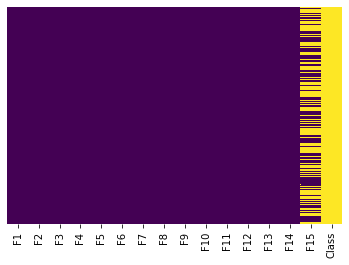

In [41]:
# Checking unique data using heatmap
sns.heatmap(test_dataset.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [42]:
# Handling null values using mean
test_dataset=test_dataset.fillna(dataset.mean())
test_dataset.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
Class    0
dtype: int64

In [43]:
test_dataset.drop("Class",axis=1)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
0,4,5.58,-4.66,31.83,69.04,-0.35,-1.29,0.06,-3.67,1,-243.75,0.94,13.84,-1.48,-11.040000
1,80,37.95,4.40,50.70,199.04,-4.83,5.19,7.25,-4.67,10,-474.75,-3.34,0.46,8.72,0.463974
2,60,1.08,-4.14,32.13,73.04,0.14,2.01,0.59,-3.67,1,-234.75,-1.08,9.36,-1.20,-11.710000
3,240,34.95,3.74,44.85,264.04,-2.92,11.52,8.45,-14.67,10,-174.75,-3.20,2.94,4.14,-10.400000
4,42,4.11,-3.78,31.92,92.04,1.09,-2.67,0.72,-3.67,1,-282.75,-0.40,11.20,0.92,-11.140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,62,5.13,-5.32,32.46,72.04,1.17,-1.62,0.41,0.33,1,-306.75,1.20,9.24,0.96,0.463974
1496,30,0.69,-3.96,32.70,78.04,-0.16,-0.57,0.01,-1.67,1,-288.75,1.48,9.68,-0.08,0.463974
1497,94,4.95,-5.38,32.19,91.04,1.99,1.47,0.56,-1.67,1,-252.75,-0.86,12.04,-0.28,0.463974
1498,70,3.72,-6.82,33.06,74.04,0.50,2.52,0.24,0.33,1,-351.75,-0.08,9.48,0.34,0.463974


In [44]:
# splitting data into features and target and normalizing features
Input=test_dataset.iloc[:,0:15]
x = Input.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
test_dataset = pd.DataFrame(x_scaled)
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0050,0.117535,0.458015,0.055396,0.080,0.513124,0.479938,0.005825,0.807692,0.1,0.580952,0.358413,0.627404,0.426602,0.202441
1,0.1000,0.803050,0.842239,0.656160,0.600,0.133785,0.646605,0.703883,0.769231,1.0,0.214286,0.065663,0.091346,0.840227,1.000000
2,0.0750,0.022236,0.480068,0.064947,0.096,0.554615,0.564815,0.057282,0.807692,0.1,0.595238,0.220246,0.447917,0.437956,0.155990
3,0.3000,0.739517,0.814249,0.469914,0.860,0.295512,0.809414,0.820388,0.384615,1.0,0.690476,0.075239,0.190705,0.654501,0.246811
4,0.0525,0.086404,0.495335,0.058262,0.172,0.635055,0.444444,0.069903,0.807692,0.1,0.519048,0.266758,0.521635,0.523925,0.195508


In [45]:
# predicting test data using svm model
test_pred=svclassifier.predict(test_dataset)

In [52]:
# Loading test data in DF
test_dataset_final=pd.read_csv("/Users/sudeepsawant/MS data/MachineLearningLAB/MachineLearningLAB/ML Assignment/CE802_P2_Data/CE802_P2_Test.csv")
target = pd.DataFrame({'Class': test_pred[:]})

In [53]:
# result = pd.concat([test_dataset_new, target], axis=1)

In [54]:
test_dataset_final['Class']=target

In [63]:
# converting 0 to false and 1 to true
cleanup = {"Class": {0:False,1: True}}
test_dataset_final.replace(cleanup, inplace=True)

In [65]:
# Write into csv
test_dataset_final.to_csv('CE802_P2_Test.csv', encoding='utf-8', index=False)